#### SEMANTIC SIMILARITY SCORE APPROACH

In [77]:
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Data for teacher
teacher_data = {
  "1":
  {
    "question": "What is the primary function of the mitochondria in a cell?",
    "answer": "The mitochondria are responsible for producing energy in the form of ATP through cellular respiration."
  },

  "2":
  {
    "question": "Explain the principle of separation of powers in government.",
    "answer": "The principle of separation of powers divides the government into three branches—legislative, executive, and judicial—to prevent abuse of power by ensuring that no one branch has complete control."
  },

  "3":
  {
    "question": "What is Newton's Second Law of Motion?",
    "answer": "Newton's Second Law states that the force acting on an object is equal to the mass of that object multiplied by its acceleration (F = ma)."
  },

  "4":
  {
    "question": "Describe the process of photosynthesis.",
    "answer": "Photosynthesis is the process by which green plants use sunlight, carbon dioxide, and water to produce glucose and oxygen."
  },

  "5":
  {
    "question": "What are the three states of matter and how do they differ?",
    "answer": "The three states of matter are solid, liquid, and gas. Solids have fixed shape and volume, liquids have fixed volume but not shape, and gases have neither fixed shape nor volume."
  },

  "6":
  {
    "question": "Define opportunity cost in economics.",
    "answer": "Opportunity cost is the value of the next best alternative foregone when a decision is made to choose one option over another."
  },

  "7":
  {
    "question": "What is the significance of the Battle of Hastings in English history?",
    "answer": "The Battle of Hastings in 1066 marked the Norman conquest of England, leading to significant cultural and political changes in the country."
  },

  "8":
  {
    "question": "What is the function of the legislative arm of government?",
    "answer": "The legislative arm of government is responsible for making, amending, and repealing laws."
  },

  "9":
  {
    "question": "Explain the concept of supply and demand.",
    "answer": "Supply and demand is an economic model that determines the price of goods in a market, where price is affected by the quantity of goods available (supply) and the desire for them (demand)."
  },

  "10":
  {
    "question": "What is the role of enzymes in biological processes?",
    "answer": "Enzymes act as catalysts in biological processes, speeding up chemical reactions without being consumed in the process."
  }
}


In [3]:
# Data for students
student_data = {
  "1": 
  {
    "question": "What is the primary function of the mitochondria in a cell?",
    "answer": "Mitochondria serve as the power generators of the cell, converting nutrients into ATP energy through the process of cellular respiration."
  },

  "2":
  {
    "question": "Explain the principle of separation of powers in government.",
    "answer": "Separation of powers ensures that authority in a government is shared among the legislative, executive, and judicial branches to maintain checks and prevent any single entity from gaining unchecked control."
  },

  "3":
  {
    "question": "What is Newton's Second Law of Motion?",
    "answer": "According to Newton's Second Law, an object's acceleration is produced when a force acts on its mass, expressed mathematically as F = m × a."
  },

  "4":
  {
    "question": "Describe the process of photosynthesis.",
    "answer": "Photosynthesis is the method by which plants convert sunlight, water, and carbon dioxide into glucose for energy and release oxygen as a byproduct."
  },

  "5":
  {
    "question": "What are the three states of matter and how do they differ?",
    "answer": "Matter exists in three main forms: solid, liquid, and gas. Solids maintain a definite shape and volume, liquids adjust shape but not volume, and gases change both shape and volume depending on their container."
  },

  "6":
  {
    "question": "Define opportunity cost in economics.",
    "answer": "Opportunity cost refers to the benefit or value lost when choosing one option over another available alternative."
  },

  "7":
  {
    "question": "What is the significance of the Battle of Hastings in English history?",
    "answer": "The 1066 Battle of Hastings was a pivotal event that led to Norman rule in England and initiated major shifts in the country's governance and cultural landscape."
  },

  "8":
  {
    "question": "What is the function of the legislative arm of government?",
    "answer": "The legislative branch plays a central role in creating, modifying, and repealing laws that govern a nation or state."
  },

  "9":
  {
    "question": "Explain the concept of supply and demand.",
    "answer": "Supply and demand is a fundamental economic theory where the price of goods is influenced by how much of a product is available and how much consumers want it."
  },

  "10":
  {
    "question": "What is the role of enzymes in biological processes?",
    "answer": "Enzymes function as biological catalysts, accelerating chemical reactions in living organisms without undergoing permanent changes themselves."
  }
}


In [4]:
# Iterating through the keys of both the teacher data to create a combined data
combined_user_data = {}
for question_id in teacher_data.keys():
    if question_id in student_data.keys():
        combined_user_data[question_id] = {
            "question": student_data[question_id]["question"],
            "student_answer": student_data[question_id]["answer"],
            "teacher_answer": teacher_data[question_id]["answer"]
        }

In [5]:
combined_user_data["1"]

{'question': 'What is the primary function of the mitochondria in a cell?',
 'student_answer': 'Mitochondria serve as the power generators of the cell, converting nutrients into ATP energy through the process of cellular respiration.',
 'teacher_answer': 'The mitochondria are responsible for producing energy in the form of ATP through cellular respiration.'}

In [7]:
from sentence_transformers import SentenceTransformer, util

# Instantiating the embedding model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# Creating an embeddings list to store the embeddings
embeddings = []

# Creating a similarity list to store the similarity scores
similarity = []
# Iterating through the combined data
for i in combined_user_data:
    # Tokenizing both the student and teacher responses
    answers_embed = model.encode([combined_user_data[i]["student_answer"], combined_user_data[i]["teacher_answer"]])
    # Appending the tokenized answers into embeddings list so we can perform similarity check
    embeddings.append(answers_embed)

    # Check for the similarity using cosine similarity from sentence transformers and store inside similarity list
    for compare, source in embeddings:
        similarity_score = util.pytorch_cos_sim(compare, source)
        similarity_score = round(float(similarity_score), 3)
        # similarity.append(round(float(similarity_score), 3))

        # Append similarity score back to its id and combined response
        combined_user_data[i]["similarity_score"] = similarity_score

In [8]:
combined_user_data

{'1': {'question': 'What is the primary function of the mitochondria in a cell?',
  'student_answer': 'Mitochondria serve as the power generators of the cell, converting nutrients into ATP energy through the process of cellular respiration.',
  'teacher_answer': 'The mitochondria are responsible for producing energy in the form of ATP through cellular respiration.',
  'similarity_score': 0.884},
 '2': {'question': 'Explain the principle of separation of powers in government.',
  'student_answer': 'Separation of powers ensures that authority in a government is shared among the legislative, executive, and judicial branches to maintain checks and prevent any single entity from gaining unchecked control.',
  'teacher_answer': 'The principle of separation of powers divides the government into three branches—legislative, executive, and judicial—to prevent abuse of power by ensuring that no one branch has complete control.',
  'similarity_score': 0.823},
 '3': {'question': "What is Newton's S

In [9]:
# Check for the similarity using cosine similarity from sentence transformers and store inside similarity list
similarity = []
for compare, source in embeddings:
    similarity_score = util.pytorch_cos_sim(compare, source)
    similarity.append(round(float(similarity_score), 3))

In [10]:
# printing out the similarity score
print(similarity)

[0.884, 0.823, 0.884, 0.918, 0.866, 0.875, 0.924, 0.731, 0.95, 0.877]


In [57]:
# Input features will be the embeddings while the target feature will be the similarity score
len(embeddings)

10

In [22]:
similarity

[0.884, 0.823, 0.884, 0.918, 0.866, 0.875, 0.924, 0.731, 0.95, 0.877]

In [58]:
# Creating X
X = []
for e in embeddings:
    X.append(e.flatten())

X = np.array(X)

In [59]:
# Creating y
y = np.array(similarity)

In [60]:
X.shape

(10, 768)

In [61]:
y.shape

(10,)

In [62]:
# Building the model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer, Input
from tensorflow.keras.optimizers import Adam, AdamW
from tensorflow.keras.losses import MeanSquaredError, MSE

In [65]:
# Building a simple ANN
model = Sequential([
    Input(shape=(X.shape[1], )),
    # First neural network layer
    Dense(32, activation="relu"),
    # Second layer
    Dense(64, activation="relu"),
    # Third neural network layer
    Dense(128, activation="relu"),
    # Four neural network layer
    Dense(256, activation="relu"),

    # Output layer
    Dense(1)
])

In [66]:
# Viewing model's architecture
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 32)             │        24,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,321 (266.88 KB)

 Trainable params: 68,321 (266.88 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
# Compile the model
model.compile(loss=MeanSquaredError(), optimizer=Adam(), metrics=["mse"])

In [68]:
# Model Training
history = model.fit(X, y, batch_size=16, epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.7654 - mse: 0.7654
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.6976 - mse: 0.6976
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.6297 - mse: 0.6297
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step - loss: 0.5551 - mse: 0.5551
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.4709 - mse: 0.4709
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.3777 - mse: 0.3777
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.2795 - mse: 0.2795
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.1829 - mse: 0.1829
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0977 - mse: 0.0977
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0395 - mse: 0.0395


In [73]:
# Visualizing the loss
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,mse
0,0.765406,0.765406
1,0.697600,0.697600
2,0.629714,0.629714
3,0.555078,0.555078
4,0.470861,0.470861


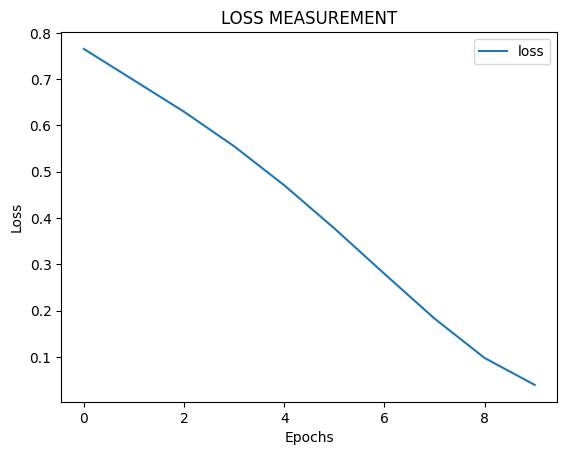

In [81]:
# Visualizing the loss of the model
history_df.loc[:, ["loss"]].plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LOSS MEASUREMENT");


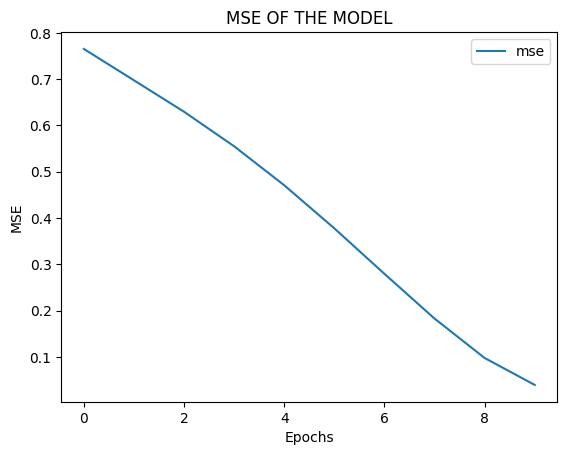

In [84]:
# Visualizing the MSE of the model
history_df.loc[:, ["mse"]].plot()
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("MSE OF THE MODEL");

In [85]:
model.evaluate(X, y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0282 - mse: 0.0282


[0.02824181690812111, 0.02824181690812111]

In [4]:
import json
import pandas as pd

In [5]:
file_path = r"C:\Users\Rise Networks\Desktop\AI_theory_grader\answer.json"

json_data = pd.read_json(file_path)

In [6]:
json_data

,question_id,type,answer,correct,status
0,5,theory,Science is the art of life,<p>Science can be define as the art of life</p>,PENDING
1,14,multiple,5,5,YES
2,15,multiple,2/3,2/3,YES
3,16,multiple,5,5,YES
4,17,alternate,True,True,YES
5,18,theory,change the position of 4 over to right by subt...,<p>Subtract 4 from both sides: 3x = 12. Divide...,PENDING
